In [ ]:
#HIPÓTESE: Mulheres brancas ganham mais do que mulheres não brancas #1


#CARREGANDO PACOTES
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#AUTENTICANDO NO GOOGLE
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#ORIGEM DE DADOS
link = 'https://drive.google.com/open?id=1O26CCq63gBRD7mVrbFPoNIxOep_yoMH0'

In [4]:
fluff, id = link.split('=')
print (id)

1O26CCq63gBRD7mVrbFPoNIxOep_yoMH0


In [0]:
#IMPORTANDO PACOTES
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import warnings
warnings.filterwarnings("ignore")

In [0]:
#CARREGANDO DATASET
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  
data = pd.read_csv('data.csv')

In [7]:
#ENTENDENDO O DATASET - INFORMAÇÕES 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66470 entries, 0 to 66469
Data columns (total 9 columns):
Unnamed: 0      66470 non-null int64
id              66470 non-null float64
idade           66470 non-null int64
sexo            66470 non-null object
anos_estudo     66036 non-null float64
cor/raca        66228 non-null object
salario         47878 non-null float64
estado_civil    66470 non-null float64
regiao          66470 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 4.6+ MB


In [0]:
#MANTENDO APENAS AS VARIÁVEIS QUE IREMOS TRABALHAR 
data = data[['sexo','cor/raca','salario']]

In [0]:
#RENOMEANDO COLUNA COR/RACA
data=data.rename(columns = {'cor/raca':'raca'})

In [0]:
#ELIMINANDO CASOS EM QUE COR/RAÇA É NULO E CASOS EM QUE O SEXO É NULO
data = data.dropna(subset=['sexo','raca'])

In [11]:
#VERIFICANDO SE OS CASOS FORAM ELIMINADOS
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66228 entries, 0 to 66469
Data columns (total 3 columns):
sexo       66228 non-null object
raca       66228 non-null object
salario    47737 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [12]:
#ENTENDENDO AS CATEGORIAS NA VARIÁVEL SEXO
data['sexo'].value_counts(dropna=False)

mulher      33492
homem       32664
gestante       72
Name: sexo, dtype: int64

In [0]:
#TRANSFORMANDO GESTANTE EM MULHER
data.loc[data.sexo == 'gestante', 'sexo'] = "mulher"

In [14]:
#VALIDANDO RESULTADO
data['sexo'].value_counts(dropna=False)

mulher    33564
homem     32664
Name: sexo, dtype: int64

In [0]:
#MANTENDO APENAS MULHERES NO DATASET
data=data.loc[data['sexo'] == 'mulher']

In [16]:
#VALIDANDO
data['sexo'].value_counts(dropna=False)

mulher    33564
Name: sexo, dtype: int64

In [17]:
#ENTENDENDO AS CATEGORIAS NA VARIÁVEL COR/RACA
data['raca'].value_counts(dropna=False)

Branca      16368
Parda       14191
Preta        2516
Indigena      299
Amarela       190
Name: raca, dtype: int64

In [18]:
#ENTENDENDO O DATASET - ESTATÍSTICAS DA VARIÁVEL SALÁRIO #2
data.describe()

,salario
count,19913.000000
mean,15612.256499
std,81270.690162
min,-1.000000
25%,2382.239990
50%,5562.000000
75%,9666.000000
max,999999.000000


In [19]:
#ENTENDENDO O DATASET - VALORES EXTREMOS
data['salario'].value_counts(dropna=False).nlargest(7)

NaN          13651
 0.0          1394
-1.0           347
 5229.0        134
 999999.0      130
 4980.0        108
 6000.0         96
Name: salario, dtype: int64

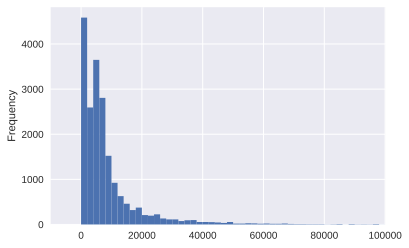

In [20]:
#HISTOGRAMA DA VARIÁVEL SALÁRIO
data['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

In [0]:
#CRIANDO MASCARA PARA EXCLUIR VALORES EXTREMOS
mascara_valores_extremos = (data['salario']>=0) & (data['salario']< 999999)

In [22]:
#ENTENDENDO O QUAL A PERDA DE DADOS COM A MASCARA
(mascara_valores_extremos.sum()/data.shape[0])*100

57.90728161125015

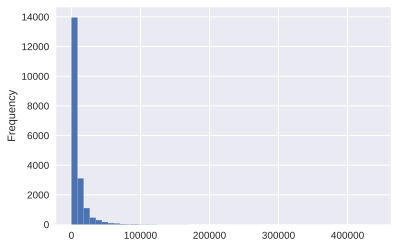

In [23]:
#PLOTANDO O HISTOGRAMA DA MASCARA
data['salario'][mascara_valores_extremos].plot.hist(bins=50)

In [0]:
#CRIANDO O NOVO DATASET SEM OS VALORES EXTREMOS
data['salario'] = data['salario'][mascara_valores_extremos]

In [25]:
#VALIDANDO SE O DATASET ESTÁ CORRETO
data['salario'].value_counts(dropna=False).nlargest(7)

NaN        14128
 0.0        1394
 5229.0      134
 4980.0      108
 6000.0       96
 7200.0       89
 7560.0       89
Name: salario, dtype: int64

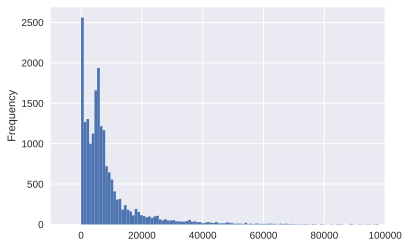

In [26]:
#PLOTANDO O HISTOGRAMA DO NOVO DATASET
data['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

In [0]:
#VERIFICANDO % DE NULOS POR RAÇA #3
perc_branca=(data[data.raca=='Branca'].salario.isna().sum())/(data[data.raca=='Branca'].raca.count())*100
perc_parda=(data[data.raca=='Parda'].salario.isna().sum())/(data[data.raca=='Parda'].raca.count())*100
perc_preta=(data[data.raca=='Preta'].salario.isna().sum())/(data[data.raca=='Preta'].raca.count())*100
perc_indigena=(data[data.raca=='Indigena'].salario.isna().sum())/(data[data.raca=='Indigena'].raca.count())*100
perc_amarela=(data[data.raca=='Amarela'].salario.isna().sum())/(data[data.raca=='Amarela'].raca.count())*100

In [28]:
perc_branca

40.01710654936461

In [29]:
perc_parda

44.35910083855965

In [30]:
perc_preta

41.693163751987285

In [31]:
perc_indigena

51.50501672240802

In [32]:
perc_amarela

42.10526315789473

In [0]:
#SUBSTITUINDO OS NULOS DE CADA RAÇA PELA MÉDIA DE SALÁRIO DA RAÇA
data['salario'].fillna(data.groupby(["raca"])["salario"].transform(np.mean), inplace=True)

In [34]:
#VALIDANDO
data['salario'].value_counts(dropna=False).nlargest(7)

11091.202929    6550
7425.935582     6295
0.000000        1394
7240.867692     1049
5743.658512      154
5229.000000      134
4980.000000      108
Name: salario, dtype: int64

In [35]:
#CALCULANDO A MÉDIA DE SALÁRIO PAEA CADA RAÇA
data.groupby('raca').salario.mean()

raca
Amarela     17304.905077
Branca      11091.202929
Indigena     5743.658512
Parda        7425.935582
Preta        7240.867692
Name: salario, dtype: float64

In [36]:
#VERIFICANDO DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33564 entries, 1 to 66468
Data columns (total 3 columns):
sexo       33564 non-null object
raca       33564 non-null object
salario    33564 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


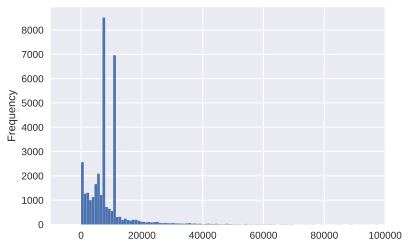

In [37]:
#HISTOGRAMA DO DATASET SEM NULOS
data['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

In [0]:
#TRANSFORMANDO OUTRAS RACAS EM OUTRAS
data.loc[data.raca != 'Branca', 'raca'] = "Outras"

In [39]:
#VALIDANDO 
data['raca'].value_counts(dropna=False)

Outras    17196
Branca    16368
Name: raca, dtype: int64

In [40]:
#MEDIA SALARIO #4
data.groupby('raca').salario.mean()

raca
Branca    11091.202929
Outras     7478.760224
Name: salario, dtype: float64

In [41]:
#MEDIANA SALARIO
data.groupby('raca').salario.median()

raca
Branca    11091.202929
Outras     7425.935582
Name: salario, dtype: float64

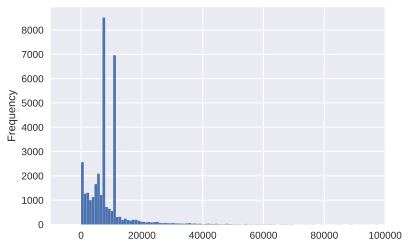

In [42]:
data['salario'].plot.hist(bins=500, xlim=(-10000, 100000))

In [43]:
#CALCULANDO AS ESTATÍSTICAS DA VARIÁVEL SALÁRIO PARA BRANCA E OUTRAS
data.groupby('raca').describe()

salario                                                              \
          count          mean           std  min          25%           50%   
raca                                                                          
Branca  16368.0  11091.202929  13800.800607  0.0  5524.200195  11091.202929   
Outras  17196.0   7478.760224   9388.046068  0.0  4721.850006   7425.935582   

                                
                 75%       max  
raca                            
Branca  11091.202929  366120.0  
Outras   7425.935582  440640.0

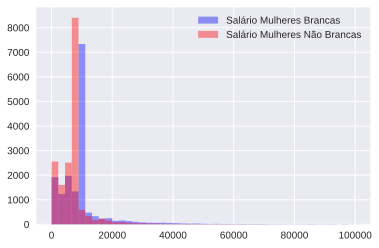

In [44]:
#HISTOGRAMA E KDE DOS DOIS GRAFICOS
from matplotlib import pyplot

bins = 45

ax = pyplot.hist(data[data.raca=='Branca']['salario'], bins, alpha=0.4, label='Salário Mulheres Brancas',color='blue', range=(0,100000))
ax = pyplot.hist(data[data.raca=='Outras']['salario'], bins, alpha=0.4, label='Salário Mulheres Não Brancas',color='red', range=(0,100000))

pyplot.legend(loc='upper right')
pyplot.show()

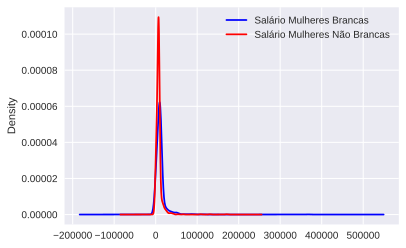

In [45]:
#PLOTANDO O KDE
ax=data[data.raca=='Branca']['salario'].sample(1000).plot.kde(label='Salário Mulheres Brancas',color='blue')
ax=data[data.raca=='Outras']['salario'].sample(1000).plot.kde(label='Salário Mulheres Não Brancas',color='red')
pyplot.legend(loc='upper right')
pyplot.show()

In [0]:
data_mulheres_brancas = data[(data['raca'] == 'Branca')]
data_mulheres_nao_brancas = data[(data['raca'] == 'Outras')]

In [0]:
#APLICANDO LOGARITMO PARA NORMALIZAR #5
data_mulheres_brancas['salario'] = np.log1p(data_mulheres_brancas['salario'])
data_mulheres_nao_brancas['salario'] = np.log1p(data_mulheres_nao_brancas['salario'])

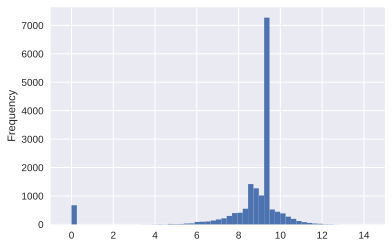

In [48]:
#HISTOGRAMA DO LOGARITMO DE MULHERES BRANCAS
  data_mulheres_brancas['salario'].plot.hist(bins=50, xlim=(-1, 15))

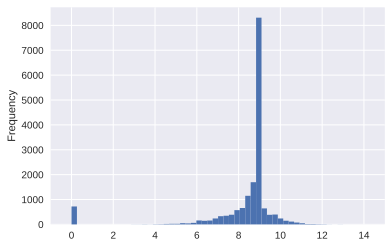

In [49]:
#HISTOGRAMA DO LOGARITMO DE MULHERES NAO BRANCAS
data_mulheres_nao_brancas['salario'].plot.hist(bins=50, xlim=(-1, 15))

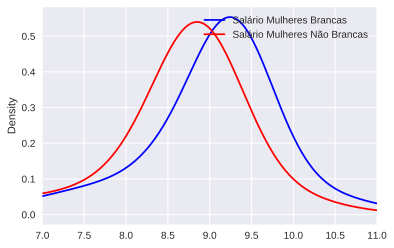

In [50]:
#KDE DO LOGARITMO
ax=data_mulheres_brancas[data_mulheres_brancas.raca=='Branca']['salario'].sample(1000).plot.kde(label='Salário Mulheres Brancas',color='blue',xlim=(7, 11))
ax=data_mulheres_nao_brancas[data_mulheres_nao_brancas.raca=='Outras']['salario'].sample(1000).plot.kde(label='Salário Mulheres Não Brancas',color='red',xlim=(7,11))
pyplot.legend(loc='upper right')
pyplot.show()

In [51]:
# CALCULANDO INTERVALO DE CONFIANCA PARA MULHERES BRANCAS USANDO Scipy.Stats
media_mulheres_brancas = data_mulheres_brancas.salario.mean()
sigma_mulheres_brancas = data_mulheres_brancas.salario.std()
n_mulheres_brancas = len(data_mulheres_brancas.salario)

limite_inferior_mulheres_brancas = st.norm.interval(alpha=0.95, loc=media_mulheres_brancas, scale=sigma_mulheres_brancas/np.sqrt(n_mulheres_brancas))[0]
limite_superior_mulheres_brancas = st.norm.interval(alpha=0.95, loc=media_mulheres_brancas, scale=sigma_mulheres_brancas/np.sqrt(n_mulheres_brancas))[1]

#print (media_mulheres_brancas,sigma_mulheres_brancas, n_mulheres_brancas)
print (limite_inferior_mulheres_brancas, limite_superior_mulheres_brancas)

8.616213812275484 8.677175012578703


In [52]:
# CALCULANDO INTERVALO DE CONFIANCA PARA MULHERES NAO BRANCAS USANDO Scipy.Stats
media_mulheres_nao_brancas = data_mulheres_nao_brancas.salario.mean()
sigma_mulheres_nao_brancas = data_mulheres_nao_brancas.salario.std()
n_mulheres_nao_brancas = len(data_mulheres_nao_brancas.salario)

limite_inferior_mulheres_nao_brancas = st.norm.interval(alpha=0.95, loc=media_mulheres_nao_brancas, scale=sigma_mulheres_nao_brancas/np.sqrt(n_mulheres_nao_brancas))[0]
limite_superior_mulheres_nao_brancas = st.norm.interval(alpha=0.95, loc=media_mulheres_nao_brancas, scale=sigma_mulheres_nao_brancas/np.sqrt(n_mulheres_nao_brancas))[1]

#print (media_mulheres_nao_brancas,sigma_mulheres_nao_brancas, n_mulheres_nao_brancas)
print (limite_inferior_mulheres_nao_brancas, limite_superior_mulheres_nao_brancas)

8.264884826272974 8.322432020120756


In [53]:
# CALCULANDO INTERVALO DE CONFIANCA PARA MULHERES NAO BRANCAS
media_mulheres_nao_brancas = data_mulheres_nao_brancas.salario.mean()

limite_inferior_mulheres_brancas < media_mulheres_nao_brancas < limite_superior_mulheres_brancas

False